<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Gowtham_Assignment_4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Here we are loading train and test mnist dataset. Keras API makes this available. Total of 70000 images are available here.60000 and 10000 are divided between train and test images.

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


There are 60000 train images with each image dimensions of width 28, height 28 and channel number is a grayscale image. So this tensor is a 3 dimentional tensor of shape (60000, 28, 28)."X_train" is the tensor used for all the train images.

.Matplotlib is a python librray used to display on of the images among the train images.The first image is printed which is a hand written digit 5.

(60000, 28, 28)


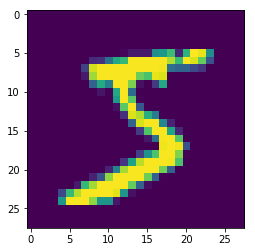

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

A 4 dimensional tensor data as input is taken by CNN model. The 1st dimension which is for applying CNN on multiple images in parallel is called a batch of images or batch size.Out of the 4 dimensions, 1st is for number of images, 2nd is for width of the image, 3rd is for height of the image, 4th is for number of channel of the image.

As per the requirement of CNN we have to modify the X_train and X_test from 3 dimensions to 4 dimensions, using reshape operation.Once the reshape is done, the image cannot be changed and code has to be rerun.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The operations performed here are

Input data precision is set to floating point 32 for better representation of input data and for better accuracy.
The normalisation between 0 to 1 is done by dividing each pixel of the image. The normalisation is done on pixel intensity which has a range between 0 to 255.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train is the ouput target given for each of the 60000 mnist train data samples. In the below cell 10 of the target values are given to limit the set. We can observe that first value is a 5, which we saw earlier while printing the imput image.

SyntaxError: ignored

In [0]:
y_train[:10]

The expected neural network target format is the integer target values that are converted to a one-hot representation because for calculating catagorical cross-entropy . Since neural network predicts 10 probabilities for each image sample during forward propagation, the cross entropy is calculated by comparing it with target value for each of the 10 predicted value. Targeting one of the values and leaving all the other values, through loss function.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In the cell below, printing ten target values in one-hot representation after conversion as this is the way nueral network understand the images.

In [0]:
Y_train[:10]


We have the actual model architecture in the cell below. We have three convolution layers flowed by a max pooling layer and then flowed by five convolution layers. Towards the end,we have 10 channels with dimenssions of 1x1 for each feature map. The flatten layer in the end makes the 10 channels as 10 output nodes. Applying softmax to the above will give us the prediction for the given input image.

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Input shape of each image or the input channel dimension is (28, 28, 1) with height, width and channel number respectively

3X3 convolution is applied twice and then max pooling is done with kernel size of 16.This is repeated again with a kernel size of 32.Then 1X1 concolution is applied with a kernel size of 10.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_split=0.1)

Training set is returning an accuracy of 98.92%

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

Test set is returning an accuracy of 99.33%

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Visualise the kernel of a layer in the nueral network and understand what each kernel sees..We can specify the layer that we can to visualise the kernels.Function takes the input image and the layer into we want to visualise.All the filter of the layer is put in a dictionary called layer_dict.We will loop through all the filters and for each filter, we iterate for 20 steps adding updated gradients everytime and process we learn each kernel.This is done using matplotlib function.

```
# This is formatted as code
```

